# 📦 Step 1: Importing Required Library

In [ ]:
import pandas as pd
import random
import time
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth

In [ ]:
# Simulate 4 real-world-like datasets
def generate_dataset(num_transactions, items_list):
    return [[random.choice(items_list) for _ in range(random.randint(2, 6))] for _ in range(num_transactions)]

items = ["Milk", "Bread", "Butter", "Eggs", "Apples", "Bananas", "Chicken", "Rice", "Juice", "Coffee"]

datasets = {
    "Dataset A": generate_dataset(1000, items),
    "Dataset B": generate_dataset(2000, items),
    "Dataset C": generate_dataset(3000, items),
    "Dataset D": generate_dataset(4000, items)
}

In [ ]:
support_thresholds = [0.01, 0.02, 0.03, 0.04]
results = []

def run_algorithm(algorithm_func, df, support):
    start_time = time.time()
    algorithm_func(df, min_support=support, use_colnames=True)
    return time.time() - start_time

# Compare algorithms on all datasets
for name, transactions in datasets.items():
    te = TransactionEncoder()
    df = pd.DataFrame(te.fit(transactions).transform(transactions), columns=te.columns_)

    for support in support_thresholds:
        time_apriori = run_algorithm(apriori, df, support)
        time_fp = run_algorithm(fpgrowth, df, support)

        results.append({
            "Dataset": name,
            "Support": support,
            "Apriori Time (s)": time_apriori,
            "FP-Growth Time (s)": time_fp
        })

In [ ]:
# Create DataFrame for results
comparison_df = pd.DataFrame(results)

# Plotting line chart
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, dataset in enumerate(datasets.keys()):
    data = comparison_df[comparison_df["Dataset"] == dataset]
    axs[i].plot(data["Support"], data["Apriori Time (s)"], label="Apriori", marker='o')
    axs[i].plot(data["Support"], data["FP-Growth Time (s)"], label="FP-Growth", marker='s')
    axs[i].set_title(f"Time Comparison - {dataset}")
    axs[i].set_xlabel("Support Threshold")
    axs[i].set_ylabel("Execution Time (seconds)")
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

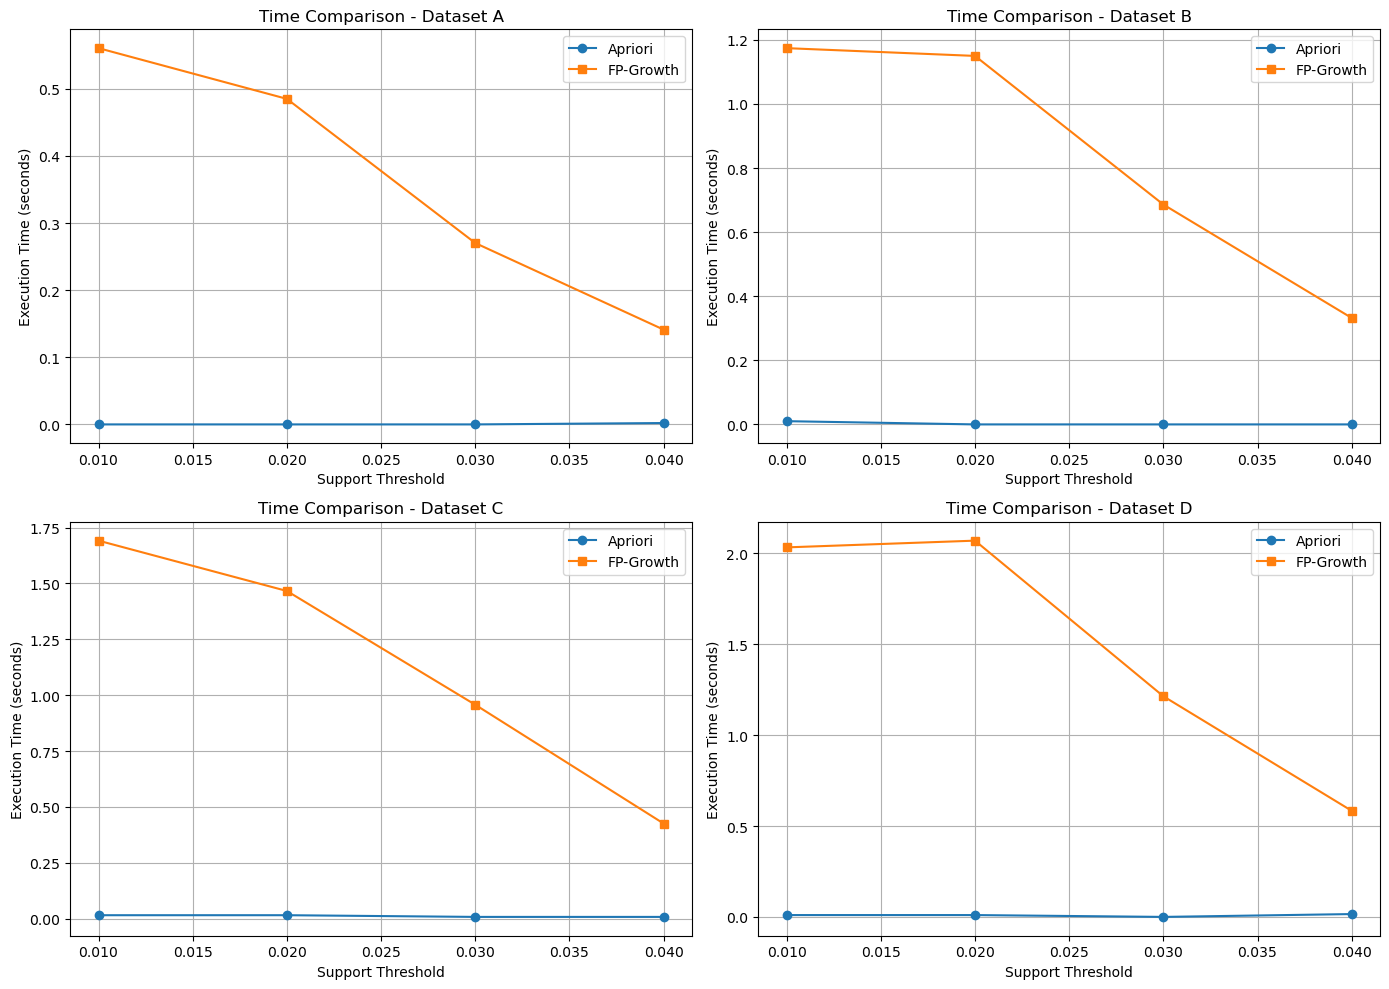

In [1]:
# Save to CSV (Optional)
comparison_df.to_csv("apriori_vs_fp_growth_times.csv", index=False)


In [4]:
dt = pd.read_csv('apriori_vs_fp_growth_times.csv')
dt.head()

,Dataset,Support,Apriori Time (s),FP-Growth Time (s)
0,Dataset A,0.01,0.000000,0.560703
1,Dataset A,0.02,0.000000,0.485089
2,Dataset A,0.03,0.000000,0.270245
3,Dataset A,0.04,0.002053,0.141192
4,Dataset B,0.01,0.010104,1.174063
